In [1]:
# Récupération des packages utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn import dummy
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.inspection import permutation_importance
import time
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Lecture de la base de données
df = pd.read_csv('projet4_propre.csv')
print(df)

     PrimaryPropertyType  CouncilDistrictCode           Neighborhood  \
0                  Hotel                    7               downtown   
1                  Hotel                    7               downtown   
2                  Hotel                    7               downtown   
3                  Hotel                    7               downtown   
4                  Hotel                    7               downtown   
...                  ...                  ...                    ...   
1644              Office                    2       greater duwamish   
1645               Other                    2               downtown   
1646               Other                    7  magnolia / queen anne   
1647  Mixed Use Property                    1       greater duwamish   
1648  Mixed Use Property                    2       greater duwamish   

      Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799                1.0              12   
1     4

In [4]:
df['TotalGHGEmissions'].max()

16870.98

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1649 non-null   object 
 1   CouncilDistrictCode              1649 non-null   int64  
 2   Neighborhood                     1649 non-null   object 
 3   Latitude                         1649 non-null   float64
 4   Longitude                        1649 non-null   float64
 5   NumberofBuildings                1649 non-null   float64
 6   NumberofFloors                   1649 non-null   int64  
 7   PropertyGFATotal                 1649 non-null   int64  
 8   PropertyGFAParking               1649 non-null   int64  
 9   PropertyGFABuilding(s)           1649 non-null   int64  
 10  LargestPropertyUseType           1649 non-null   object 
 11  LargestPropertyUseTypeGFA        1649 non-null   float64
 12  SecondLargestPropert

# Création de l'environnement de mise en place et d'évaluation des modèles

In [6]:
#Création de la target

X = df.drop(['log_SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],axis=1)
y = df['TotalGHGEmissions']

In [7]:
X.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,60.0,0.0,1.0,0.0,Compliant,89
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.0,0.0,1.0,Compliant,20
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,43.0,0.0,1.0,0.0,Compliant,47
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,56.0,0.0,1.0,0.0,Compliant,90
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,0.0,0.0,1.0,Compliant,36


### Création des pipelines

Nous testerons les modèles suivants : Régression linéaire, Regression Ridge, Adaboost, SVR, RFR, kNN ainsi qu'un DummyRegressor

Nous appliquerons un StandardScaler pour nos données numériques et un OneHotEncoder pour nos données catégoriques

In [8]:
X.dtypes

PrimaryPropertyType                 object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SteamUse(kBtu)                     float64
Electricity(kBtu)                  float64
NaturalGas(kBtu)                   float64
ComplianceStatus                    object
AgeBatiment                          int64
dtype: object

# 1ère Partie : Sans EnergyStarScore

In [9]:
X = X.drop(['ENERGYSTARScore'], axis =1)

In [10]:
# Encodage/scaling de nos données en fonction de leur type
from sklearn.impute import SimpleImputer

col_num_int = list(X.select_dtypes(include=["int64"]))
col_num_float = list(X.select_dtypes(include=["float64"]))
col_cat = list(X.select_dtypes(include=["object"]))



ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()
col_num_int_pipe = Pipeline(steps = [('scaler', scaler)])

col_cat_pipe = Pipeline(steps = [('OneHot', ohe)])


In [11]:
preprocessor = ColumnTransformer(transformers=[('ints', col_num_int_pipe, col_num_int),
       ('floats', col_num_int_pipe, col_num_float),
       ('category', col_cat_pipe, col_cat)])

In [12]:
# Création des pipelines pour chacun des modèles testés

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
svr = Pipeline(steps=[('preprocessing',preprocessor),('SVR',SVR())])
elastic = Pipeline(steps=[('preprocessing',preprocessor),('elastic', ElasticNet())])
linear_reg = Pipeline(steps=[('preprocessing',preprocessor),('linear_reg',linear_model.LinearRegression())])
ridge_reg = Pipeline(steps=[('preprocessing',preprocessor),('ridge_reg', Ridge())])
rfr = Pipeline(steps=[('preprocessing',preprocessor),('RFR',RandomForestRegressor(random_state=0))])
knn = Pipeline(steps=[('preprocessing',preprocessor),('kNN',KNeighborsRegressor())])
ada = Pipeline(steps=[('preprocessing',preprocessor),('ADA',AdaBoostRegressor(random_state=0,))])
dummy = Pipeline(steps=[('preprocessing',preprocessor),('dummy',DummyRegressor(strategy='mean'))])

gradient = Pipeline(steps=[('preprocessing',preprocessor),('GradientBoosting', GradientBoostingRegressor())])

## Séparation du jeu de données

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(1319, 21)

In [15]:
X_test.shape

(330, 21)

In [16]:
X_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,0.0,0.0,1.0,Compliant,61


In [17]:
rfr.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CouncilDistrictCode',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'AgeBatiment']),
                                                 ('floats',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
          

## Recherche des hyperparamètres optimaux pour chacune des catégories de modèles

#### ElasticNet

In [18]:
parameters_elastic = {'elastic__tol' : [0.1,0.01,0.001,0.0001], #seuil de tolérance de modification des poids pour que 
                                                       #l'algorithme converge
              "elastic__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #poids du terme de pénalité
              "elastic__l1_ratio": [0, 0.2,0.4,0.6,0.8,1]} #0 = Ridge / 1= Lasso

elastic_search = GridSearchCV(elastic,
                               param_grid = parameters_elastic,
                              scoring= 'neg_mean_squared_error',
                              verbose=3,
                               cv=5)

elastic_search_cv = elastic_search.fit(X_train, y_train)


Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-202042.044 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63306386.901456475, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-91745.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53959038.5576666, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1825334.095 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-429654.630 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63006040.9598296, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-161870.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51391608.45559542, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-203718.885 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63306386.901456475, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-91745.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53959038.5576666, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1825334.095 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30803517.503272142, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-433858.218 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63006040.9598296, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-161870.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51391608.45559542, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-203718.885 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63306386.901456475, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-91745.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53959038.5576666, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1825334.095 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30803517.503272142, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-433858.218 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63006040.9598296, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-161870.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51391608.45559542, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-203718.885 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63306386.901456475, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-91745.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53959038.5576666, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1825334.095 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30803517.503272142, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-433858.218 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63006040.9598296, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-161870.641 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-203419.568 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62990535.02217695, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-92271.522 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53621302.60560271, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1827594.550 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-429845.135 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62795190.31797057, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-162008.761 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51069138.972263224, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-204787.194 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62990535.02217695, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-92271.522 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53621302.60560271, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1827594.550 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30532269.884384934, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-434354.956 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62795190.31797057, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-162008.761 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51069138.972263224, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-204787.194 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62990535.02217695, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-92271.522 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53621302.60560271, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1827594.550 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30532269.884384934, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-434354.956 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62795190.31797057, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-162008.761 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51069138.972263224, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-204787.194 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62990535.02217695, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-92271.522 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53621302.60560271, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1827594.550 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30532269.884384934, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-434354.956 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62795190.31797057, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-162008.761 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-204924.716 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62614464.611548066, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-92816.241 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53218683.752266645, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1830153.284 total time=   0.6s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-423017.428 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62535428.003205374, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-162168.505 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50701937.80088885, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-205916.962 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62614464.611548066, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-92816.241 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53218683.752266645, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1830153.284 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30224007.21623059, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-434921.672 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62535428.003205374, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-162168.505 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50701937.80088885, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-205916.962 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62614464.611548066, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-92816.241 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53218683.752266645, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1830153.284 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30224007.21623059, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-434921.672 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62535428.003205374, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-162168.505 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50701937.80088885, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-205916.962 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62614464.611548066, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-92816.241 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53218683.752266645, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1830153.284 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30224007.21623059, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-434921.672 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62535428.003205374, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-162168.505 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-206814.687 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62077229.81669478, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-93377.521 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52772354.44096244, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1833032.807 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-423170.755 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62152906.25463945, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-162342.678 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50269215.25114246, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-207118.357 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62077229.81669478, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-93377.521 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52772354.44096244, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1833032.807 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29835890.235617492, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-435564.662 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62152906.25463945, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-162342.678 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50269215.25114246, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-207118.357 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62077229.81669478, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-93377.521 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52772354.44096244, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1833032.807 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29835890.235617492, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-435564.662 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62152906.25463945, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-162342.678 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50269215.25114246, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-207118.357 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62077229.81669478, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-93377.521 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52772354.44096244, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1833032.807 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29835890.235617492, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-435564.662 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62152906.25463945, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-162342.678 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-208869.391 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61700243.49172298, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-93957.405 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52435720.812437974, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1836165.551 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-423360.295 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61235740.039380565, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-162437.765 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49920605.47856578, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-208401.525 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61700243.49172298, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-93957.405 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52435720.812437974, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1836165.551 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29186463.179935046, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-436267.060 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61235740.039380565, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-162437.765 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49920605.47856578, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-208401.525 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61700243.49172298, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-93957.405 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52435720.812437974, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1836165.551 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29186463.179935046, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-436267.060 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61235740.039380565, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-162437.765 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49920605.47856578, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-208401.525 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61700243.49172298, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-93957.405 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52435720.812437974, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1836165.551 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29186463.179935046, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-436267.060 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61235740.039380565, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-162437.765 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-209486.661 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58040691.761819296, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-94797.530 total time=   0.5s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1839343.490 total time=   0.1s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-423588.802 total time=   0.0s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-162933.952 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47272312.78898365, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-209561.360 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58040691.761819296, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-94797.530 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20164137.740221567, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1839317.764 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25331438.032268964, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-436749.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52394196.00812672, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-162934.067 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47272312.78898365, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-209561.360 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58040691.761819296, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-94797.530 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20164137.740221567, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1839317.764 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25331438.032268964, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-436749.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52394196.00812672, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-162934.067 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47272312.78898365, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-209561.360 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58040691.761819296, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-94797.530 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20164137.740221567, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1839317.764 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25331438.032268964, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-436749.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52394196.00812672, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-162934.067 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59600628.95046626, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-180825.058 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71084925.34535068, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-78536.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60718740.56338748, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1843873.355 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36930404.17896606, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-435652.553 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67523104.77390112, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-164117.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59600628.95046626, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-180825.058 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71084925.34535068, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-78536.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60718740.56338748, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1843873.355 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36930404.17896606, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-435652.553 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67523104.77390112, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-164117.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59600628.95046626, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-180825.058 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71084925.34535068, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-78536.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60718740.56338748, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1843873.355 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36930404.17896606, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-435652.553 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67523104.77390112, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-164117.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59600628.95046626, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-180825.058 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71084925.34535068, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-78536.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60718740.56338748, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1843873.355 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36930404.17896606, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-435652.553 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67523104.77390112, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-164117.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57933605.74495979, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-183851.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69376440.81496087, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-80532.493 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59111891.86078641, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1830139.331 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35372875.6324543, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-433545.418 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66420420.36768764, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-162901.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57933605.74495979, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-183851.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69376440.81496087, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-80532.493 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59111891.86078641, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1830139.331 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35372875.6324543, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-433545.418 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66420420.36768764, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-162901.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57933605.74495979, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-183851.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69376440.81496087, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-80532.493 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59111891.86078641, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1830139.331 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35372875.6324543, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-433545.418 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66420420.36768764, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-162901.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57933605.74495979, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-183851.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69376440.81496087, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-80532.493 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59111891.86078641, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1830139.331 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35372875.6324543, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-433545.418 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66420420.36768764, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-162901.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56155101.87580361, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-187583.476 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67576032.47204907, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-82867.679 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57465997.05843264, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1819414.795 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33942430.875698864, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-431949.438 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65286065.24836749, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-161920.969 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56155101.87580361, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-187583.476 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67576032.47204907, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-82867.679 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57465997.05843264, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1819414.795 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33942430.875698864, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-431949.438 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65286065.24836749, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-161920.969 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56155101.87580361, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-187583.476 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67576032.47204907, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-82867.679 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57465997.05843264, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1819414.795 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33942430.875698864, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-431949.438 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65286065.24836749, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-161920.969 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56155101.87580361, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-187583.476 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67576032.47204907, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-82867.679 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57465997.05843264, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1819414.795 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33942430.875698864, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-431949.438 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65286065.24836749, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-161920.969 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54138111.48562019, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-192397.309 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65543014.410660446, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-85698.194 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55572034.01501844, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1813818.965 total time=   0.5s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-442682.431 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64000767.53307194, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-161314.483 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54138111.48562019, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-192397.309 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65543014.410660446, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-85698.194 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55572034.01501844, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1813818.965 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32373928.242548764, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-431220.662 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64000767.53307194, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-161314.483 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54138111.48562019, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-192397.309 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65543014.410660446, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-85698.194 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55572034.01501844, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1813818.965 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32373928.242548764, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-431220.662 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64000767.53307194, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-161314.483 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54138111.48562019, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-192397.309 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65543014.410660446, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-85698.194 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55572034.01501844, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1813818.965 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32373928.242548764, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-431220.662 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64000767.53307194, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-161314.483 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-197142.397 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62822218.411753245, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-89341.876 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52837161.910081916, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1817348.440 total time=   0.5s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-433827.287 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62167310.08935256, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-161339.257 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51521382.75170134, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-199074.356 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62822218.411753245, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-89341.876 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52837161.910081916, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1817348.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30244916.648674637, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-432140.115 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62167310.08935256, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-161339.257 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51521382.75170134, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-199074.356 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62822218.411753245, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-89341.876 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52837161.910081916, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1817348.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30244916.648674637, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-432140.115 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62167310.08935256, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-161339.257 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51521382.75170134, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-199074.356 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62822218.411753245, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-89341.876 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52837161.910081916, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1817348.440 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30244916.648674637, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-432140.115 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62167310.08935256, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-161339.257 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-209450.093 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-94699.773 total time=   0.4s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1839019.638 total time=   0.1s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-423591.458 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-162877.120 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29155813.64653492, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-209489.532 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32851497.683327623, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-94714.038 total time=   0.5s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1838771.284 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13118871.984159268, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9121287.465052277, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-436641.231 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16803141.488999255, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-162919.776 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29155813.64653492, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-209489.532 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32851497.683327623, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-94714.038 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13118871.984159268, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1838771.284 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9121287.465052277, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-436641.231 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16803141.488999255, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-162919.776 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29155813.64653492, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-209489.532 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32851497.683327623, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-94714.038 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13118871.984159268, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1838771.284 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9121287.465052277, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-436641.231 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16803141.488999255, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-162919.776 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89022529.37935367, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-154959.822 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100436102.86611971, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-61637.887 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81418837.48630479, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2428532.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54348774.032994375, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-547091.513 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85976223.51458777, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-222509.899 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89022529.37935367, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-154959.822 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100436102.86611971, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-61637.887 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81418837.48630479, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2428532.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54348774.032994375, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-547091.513 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85976223.51458777, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-222509.899 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89022529.37935367, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-154959.822 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100436102.86611971, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-61637.887 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81418837.48630479, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2428532.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54348774.032994375, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-547091.513 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85976223.51458777, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-222509.899 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89022529.37935367, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-154959.822 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100436102.86611971, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-61637.887 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81418837.48630479, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2428532.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54348774.032994375, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-547091.513 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85976223.51458777, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-222509.899 total time=   0.5s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-155939.054 total time=   0.2s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-61176.207 total time=   0.2s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2341113.467 total time=   0.1s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-527975.528 total time=   0.2s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-212734.356 total time=   0.2s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-155938.734 total time=   0.2s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-61175.179 total time=   0.2s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2341181.13

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22793681.922203913, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-171006.357 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25810726.777765058, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-71323.665 total time=   0.6s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1928351.779 total time=   0.5s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-449529.211 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20532967.37320266, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-171520.902 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22793681.922203913, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-171006.357 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25810726.777765058, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-71323.665 total time=   0.5s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1928379.445 total time=   0.5s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-449503.071 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20532967.37320266, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-171520.902 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22793681.922203913, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-171006.357 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25810726.777765058, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-71323.665 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306060.9535019696, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1928402.542 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209869.06861258298, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-449501.837 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20532967.37320266, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-171520.902 total time=   0.5s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-209350.812 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-93706.674 total time=   0.2s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1836353.244 total time=   0.0s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-423615.189 total time=   0.0s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-161822.346 total time=   0.2s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.01;, score=-208855.464 total time=   0.5s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.01;, score=-93865.185 total time=   0.5s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1834283.183 total time= 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2993911.7349439412, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-208857.967 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711158.73010692, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-93864.428 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2569196.6666909754, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1833980.465 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1437097.5400702432, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-436138.367 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2462301.543328017, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-161938.996 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2993911.7349439412, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-208857.967 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711158.73010692, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-93864.428 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2569196.6666909754, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1833980.465 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1437097.5400702432, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-436138.367 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2462301.543328017, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-161938.996 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128166322.3238423, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-163755.341 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137536018.5460936, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-93685.768 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113933426.0159694, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2604066.597 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71169105.99686265, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-715976.688 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116002163.8032702, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-286618.661 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128166322.3238423, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-163755.341 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137536018.5460936, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-93685.768 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113933426.0159694, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2604066.597 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71169105.99686265, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-715976.688 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116002163.8032702, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-286618.661 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128166322.3238423, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-163755.341 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137536018.5460936, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-93685.768 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113933426.0159694, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2604066.597 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71169105.99686265, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-715976.688 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116002163.8032702, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-286618.661 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128166322.3238423, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-163755.341 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137536018.5460936, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-93685.768 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113933426.0159694, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2604066.597 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71169105.99686265, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-715976.688 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116002163.8032702, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-286618.661 total time=   0.5s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-162895.713 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-90658.066 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2685147.784 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-705611.016 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-286908.472 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-162894.739 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-90659.775 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2685660.460 total t

[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-2670358.466 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-610267.050 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-253438.983 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-155238.611 total time=   0.1s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-68239.414 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2670909.344 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-610277.664 total time=   0.1s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-253440.359 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-20

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82420.41971421242, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-202865.228 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97108.57431969047, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-86461.152 total time=   0.4s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1793096.936 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138381.0813523531, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-433928.319 total time=   0.4s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-155661.954 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167924098.5128068, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-177137.617 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177503767.8228058, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-115921.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156628491.52638876, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-707572.674 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93956132.2799434, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-796003.705 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160001466.55257636, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-249685.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167924098.5128068, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-177137.617 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177503767.8228058, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-115921.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156628491.52638876, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-707572.674 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93956132.2799434, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-796003.705 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160001466.55257636, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-249685.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167924098.5128068, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-177137.617 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177503767.8228058, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-115921.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156628491.52638876, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-707572.674 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93956132.2799434, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-796003.705 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160001466.55257636, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-249685.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167924098.5128068, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-177137.617 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177503767.8228058, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-115921.831 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156628491.52638876, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-707572.674 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93956132.2799434, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-796003.705 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160001466.55257636, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-249685.831 total time=   0.5s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-174342.535 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-113789.923 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-906491.222 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-787585.146 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-251711.364 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-174335.710 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-113789.639 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-906610.459 total time=   0.0s
[CV 4/

[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-166633.624 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-101923.648 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2168629.892 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-743591.806 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-277197.886 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-179315.607 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-78193.252 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1687561.295 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-451841.862 total time=   0.0s
[C

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404222.89941260964, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.001;, score=-442854.870 total time=   0.4s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.001;, score=-144412.962 total time=   0.1s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-178751.464 total time=   0.2s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-75552.426 total time=   0.2s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1624099.754 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404222.89941260964, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-442854.870 total time=   0.3s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-144433.271 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231675189.810674, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-236556.649 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244849812.06235498, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-147715.196 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210386229.4289461, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-129678.978 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142063000.52160382, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-930812.622 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228793283.64820486, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-268737.082 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231675189.810674, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-236556.649 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244849812.06235498, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-147715.196 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210386229.4289461, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-129678.978 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142063000.52160382, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-930812.622 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228793283.64820486, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-268737.082 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231675189.810674, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-236556.649 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244849812.06235498, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-147715.196 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210386229.4289461, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-129678.978 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142063000.52160382, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-930812.622 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228793283.64820486, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-268737.082 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231675189.810674, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-236556.649 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244849812.06235498, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-147715.196 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210386229.4289461, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-129678.978 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142063000.52160382, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-930812.622 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228793283.64820486, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-268737.082 total time=   0.5s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-230288.727 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-144742.496 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-94726.127 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-918099.512 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-265716.399 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-230263.546 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-144730.199 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-94583.742 total time=   0.0s

[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-126078.946 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-214124.168 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-837249.077 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-250948.789 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-162669.048 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-60368.110 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1876382.628 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-623631.795 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-195209.239 total time=   0.0s

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260064147.31087303, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-278166.345 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274920966.41280115, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-167520.937 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230475737.6161182, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-452137.483 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164004792.91945562, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1008096.470 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258938078.77878565, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-289723.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260064147.31087303, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-278166.345 total time=   0.7s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274920966.41280115, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-167520.937 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230475737.6161182, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-452137.483 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164004792.91945562, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1008096.470 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258938078.77878565, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-289723.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260064147.31087303, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-278166.345 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274920966.41280115, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-167520.937 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230475737.6161182, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-452137.483 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164004792.91945562, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1008096.470 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258938078.77878565, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-289723.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260064147.31087303, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-278166.345 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274920966.41280115, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-167520.937 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230475737.6161182, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-452137.483 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164004792.91945562, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1008096.470 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258938078.77878565, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-289723.547 total time=   0.5s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-277206.830 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-167128.046 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-441545.043 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1006376.484 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-289307.276 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-277205.300 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-167127.192 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-441537.204 total 

[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-262444.363 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-160394.918 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-311888.745 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-982122.633 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-282054.642 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-198834.519 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-127846.433 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-962201.977 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-811984.006 tota

In [19]:
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(elastic_search_cv.best_params_))
print("Le meilleur score est {}".format(elastic_search_cv.best_score_))

Les meilleurs hyper-paramètres pour le ElasticNet sont: {'elastic__alpha': 10, 'elastic__l1_ratio': 0.6, 'elastic__tol': 0.01}
Le meilleur score est -306443.7752177668


In [20]:
# Récupèration du score r2 à partir de la grille optimale
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_elastic_opti = {key :[value] for key,value in elastic_search_cv.best_params_.items()}
parameters_elastic_opti



{'elastic__alpha': [10], 'elastic__l1_ratio': [0.6], 'elastic__tol': [0.01]}

In [21]:
start_time = time.time()


elastic_search_opti = GridSearchCV(elastic,
                               param_grid = parameters_elastic_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

elastic_search_r2 = elastic_search_opti.fit(X_train, y_train)

elapsed_time = time.time() - start_time


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.262 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.211 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.896 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.142 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.120 total time=   0.0s


In [22]:
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(elastic_search_r2.best_params_))
print("Le meilleur score est {}".format(elastic_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Les meilleurs hyper-paramètres pour le ElasticNet sont: {'elastic__alpha': 10, 'elastic__l1_ratio': 0.6, 'elastic__tol': 0.01}
Le meilleur score est 0.32597402245362694
Elapsed time to compute the importances: 0.168 seconds


In [23]:
start_elastic = time.time()
y_pred = elastic_search_r2.predict(X_train)
end_elastic = time.time()

predict_time_elastic = end_elastic - start_elastic

In [24]:
resultats_ghg = pd.DataFrame({})
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['ElasticNet'],
    'Score_RMSE' : [np.sqrt(-elastic_search_cv.best_score_)],
    'Score_R2' : [elastic_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time],
    'TempsPrédictionOpti':[predict_time_elastic]}),
              ignore_index=True)

In [25]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.57364,0.325974,0.168242,0.008976


#### RandomForestRegressor

In [26]:
parameters_rfr = {'RFR__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'RFR__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'RFR__max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}
    
rfr_search = GridSearchCV(rfr,
                               param_grid = parameters_rfr,
                              verbose=3,
                              scoring = 'neg_mean_squared_error',
                               cv=5)

rfr_search_cv = rfr_search.fit(X_train, y_train)

print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_search_cv.best_params_))
print("Le meilleur score est {}".format(rfr_search_cv.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-134737.744 total time=   0.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-25120.477 total time=   0.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-260232.249 total time=   0.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-272605.889 total time=   0.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-132478.688 total time=   0.2s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-127983.365 total time=   1.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-24980.248 total time=   1.4s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, s

[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=300;, score=-290261.927 total time=   3.8s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=300;, score=-583122.213 total time=   3.9s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=300;, score=-148629.053 total time=   3.7s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-137265.036 total time=   6.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-38401.530 total time=   6.3s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-291659.758 total time=   6.4s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-596348.420 total time=   6.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-145392.281 total time=   6.3s
[CV 1/5] END RFR_

[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-131136.842 total time=   0.2s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-49596.410 total time=   0.2s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-337389.791 total time=   0.2s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-574944.491 total time=   0.2s
[CV 5/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-152967.557 total time=   0.2s
[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-132884.980 total time=   0.6s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-48651.499 total time=   0.7s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-316395.057 total time=   0.7s
[CV 4/5] END RFR__

In [27]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_rfr_opti = {key :[value] for key,value in rfr_search_cv.best_params_.items()}
parameters_rfr_opti

start_time2 = time.time()

rfr_search_opti = GridSearchCV(rfr,
                               param_grid = parameters_rfr_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

rfr_search_r2 = rfr_search_opti.fit(X_train, y_train)
elapsed_time2 = time.time() - start_time2
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(rfr_search_r2.best_params_))
print("Le meilleur score est {}".format(rfr_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time2:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.528 total time=   0.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.853 total time=   0.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.500 total time=   0.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.733 total time=   0.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.546 total time=   0.2s
Les meilleurs hyper-paramètres pour le ElasticNet sont: {'RFR__max_features': 'auto', 'RFR__min_samples_leaf': 1, 'RFR__n_estimators': 10}
Le meilleur score est 0.6317991206618778
Elapsed time to compute the importances: 1.816 seconds


In [28]:
start_rfr = time.time()
y_pred = rfr_search_r2.predict(X_train)
end_rfr = time.time()

predict_time_rfr = end_rfr - start_rfr

In [29]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['RandomForestReg'],
    'Score_RMSE' : [np.sqrt(-rfr_search_cv.best_score_)],
    'Score_R2' : [rfr_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time2],
    'TempsPrédictionOpti': [predict_time_rfr]}),
              ignore_index=True)

In [30]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964


In [31]:
import pickle
pickle.dump(rfr_search_r2, open('rfr_search_r2_emissions.pickle', 'wb'))
pic_rfr_search2 = pickle.load(open('rfr_search_r2_emissions.pickle', 'rb'))

#### SupportVectorRegression

In [32]:
parameters_svr = {'SVR__gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 
              'SVR__epsilon' : [0.001, 0.01, 0.1, 1], #erreur acceptée par l'algorithme
              'SVR__C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svr_search = GridSearchCV(svr, 
                      param_grid = parameters_svr,
                      cv=5,
                        scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

svr_search_cv = svr_search.fit(X_train, y_train)
print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_search_cv.best_params_))
print("Le meilleur score est {}".format(svr_search_cv.best_score_))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-307632.814 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-186904.401 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-537087.273 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-1044977.698 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-307632.814 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-186904.401 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-537087.272 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1044977.698 total time=   0.0s
[CV 5/5]

[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-307640.296 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-186900.619 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-537074.200 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-1044971.404 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-307640.296 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-186900.619 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-537074.199 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1044971.404 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-301371.224 total t

[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-537087.272 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-1044977.698 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-307632.813 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-186904.400 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-537087.263 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1044977.696 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-301371.223 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-307632.804 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-186904.3

[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-1044971.404 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-307640.295 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-186900.619 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-537074.190 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1044971.402 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-301371.223 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-307640.281 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-186900.617 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-537074.094 total time=   0.0

[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-186904.392 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-537087.167 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1044977.673 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-301371.219 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-307632.711 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-186904.311 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-537086.223 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-1044977.445 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-301371.178 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-307631.785 total t

[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1044971.380 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-301371.219 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-307640.144 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-186900.595 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-537073.136 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-1044971.162 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-301371.178 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-307638.775 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-186900.382 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-537064.852 total time=   0.0s
[CV 4/5]

[CV 3/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-537076.769 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-1044975.163 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-301370.765 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-307622.520 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-186895.352 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-536995.155 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-1044952.402 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-301366.651 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-307501.605 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-186838.180 total time=   0.0s
[CV 3/

[CV 2/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-186898.251 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-536980.719 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-1044947.314 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-301366.677 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-307490.004 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-186841.667 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-536730.557 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-1044746.676 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-301299.471 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-306277.542 total time=   0.0s
[CV 2/5] END SVR__C=1, 

[CV 2/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-186075.787 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-533425.938 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-1042690.357 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-300596.577 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-296953.739 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-180658.977 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-522766.651 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-1026712.441 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-295653.524 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-274344.663 total time=   

[CV 1/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-296947.247 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-180658.817 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-522773.570 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-1026734.299 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-295640.574 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-274319.103 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-166065.295 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-505553.480 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-996193.538 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-281586.238 total time=   0.0s
[CV 1/5] END SVR__C=10, 

In [33]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_svr_opti = {key :[value] for key,value in svr_search_cv.best_params_.items()}
parameters_svr_opti

start_time3 = time.time()

svr_search_opti = GridSearchCV(svr,
                               param_grid = parameters_svr_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

svr_search_r2 = svr_search_opti.fit(X_train, y_train)
elapsed_time3 = time.time() - start_time3
print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_search_r2.best_params_))
print("Le meilleur score est {}".format(svr_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time3:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=0.038 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=0.029 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=0.028 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=0.023 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=0.035 total time=   0.0s
Les meilleurs hyper-paramètres pour la SVR sont: {'SVR__C': 10, 'SVR__epsilon': 1, 'SVR__gamma': 0.01}
Le meilleur score est 0.030744055382026514
Elapsed time to compute the importances: 0.717 seconds


In [34]:
start_svr = time.time()
y_pred = svr_search_r2.predict(X_train)
end_svr = time.time()

predict_time_svr = end_svr - start_svr

In [35]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['SVR'],
    'Score_RMSE' : [np.sqrt(-svr_search_cv.best_score_)],
    'Score_R2' : [svr_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time3],
    'TempsPrédictionOpti' : [predict_time_svr]}),
              ignore_index=True)

In [36]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297


#### Adaboost

In [37]:
parameters_ada = {"ADA__n_estimators": [20,30,50,70],
              "ADA__learning_rate": [0.5, 1, 2, 3],
              "ADA__loss": ['linear', 'square', 'exponential'], 
              }

ada_search = GridSearchCV(ada, 
                      param_grid = parameters_ada,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

ada_search_cv = ada_search.fit(X_train, y_train)
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_search_cv.best_params_))
print("Le meilleur score est {}".format(ada_search_cv.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-179248.446 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-56967.712 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-262216.266 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-810066.027 total time=   0.0s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-116261.948 total time=   0.0s
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-186907.818 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-58753.086 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-92240.897 total time=   0.0s
[CV 4/5] END ADA__lea

[CV 3/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-155367.583 total time=   0.1s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-959069.203 total time=   0.1s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-123177.606 total time=   0.0s
[CV 1/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-217219.084 total time=   0.1s
[CV 2/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-77986.381 total time=   0.0s
[CV 3/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-172094.558 total time=   0.1s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-937594.117 total time=   0.1s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-123177.606 total time=   0.0s
[CV 1/5] END ADA__learning_rate=1, ADA__loss=square, ADA__n_estimators=20;, score=-193982.885 tot

[CV 1/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-758356.560 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-591659.777 total time=   0.0s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-577097.174 total time=   0.0s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-731945.228 total time=   0.0s
[CV 5/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-381134.828 total time=   0.0s
[CV 1/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-281975.819 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-591192.363 total time=   0.0s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-577086.116 total time=   0.0s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-732584.412 to

[CV 3/5] END ADA__learning_rate=3, ADA__loss=square, ADA__n_estimators=70;, score=-517933.777 total time=   0.1s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=square, ADA__n_estimators=70;, score=-1109512.058 total time=   0.1s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=square, ADA__n_estimators=70;, score=-305692.603 total time=   0.1s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-246306.286 total time=   0.0s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-113666.192 total time=   0.0s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-449566.257 total time=   0.0s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-715420.044 total time=   0.0s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-235391.180 total time=   0.0s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estim

In [38]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ada_opti = {key :[value] for key,value in ada_search_cv.best_params_.items()}
parameters_ada_opti



start_time4 = time.time()

ada_search_opti = GridSearchCV(ada,
                               param_grid = parameters_ada_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

ada_search_r2 = ada_search_opti.fit(X_train, y_train)
elapsed_time4 = time.time() - start_time4
print(f"Elapsed time to compute the importances: {elapsed_time4:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.406 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.667 total time=   0.1s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.421 total time=   0.1s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.520 total time=   0.0s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.588 total time=   0.0s
Elapsed time to compute the importances: 0.934 seconds


In [39]:
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_search_r2.best_params_))
print("Le meilleur score est {}".format(ada_search_r2.best_score_))

Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {'ADA__learning_rate': 0.5, 'ADA__loss': 'square', 'ADA__n_estimators': 30}
Le meilleur score est 0.5207678003793479


In [40]:
start_ada = time.time()
y_pred = ada_search_r2.predict(X_train)
end_ada = time.time()

predict_time_ada = end_ada - start_ada

In [41]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['Adaboost'],
    'Score_RMSE' : [np.sqrt(-ada_search_cv.best_score_)],
    'Score_R2' : [ada_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time4],
    'TempsPrédictionOpti': [predict_time_ada]}),
              ignore_index=True)

In [42]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947


#### k-NearestNeighbours

In [43]:
parameters_knn = {"kNN__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]
              }

knn_search = GridSearchCV(knn, 
                      param_grid = parameters_knn,
                      cv=5,scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

knn_search_cv = knn_search.fit(X_train, y_train)
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_search_cv.best_params_))
print("Le meilleur score est {}".format(knn_search_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..........kNN__n_neighbors=2;, score=-405212.612 total time=   0.0s
[CV 2/5] END ...........kNN__n_neighbors=2;, score=-79027.600 total time=   0.0s
[CV 3/5] END ..........kNN__n_neighbors=2;, score=-136933.174 total time=   0.0s
[CV 4/5] END ..........kNN__n_neighbors=2;, score=-752217.906 total time=   0.0s
[CV 5/5] END ..........kNN__n_neighbors=2;, score=-348959.310 total time=   0.0s
[CV 1/5] END ..........kNN__n_neighbors=3;, score=-223895.276 total time=   0.0s
[CV 2/5] END ...........kNN__n_neighbors=3;, score=-78283.189 total time=   0.0s
[CV 3/5] END ..........kNN__n_neighbors=3;, score=-103461.889 total time=   0.0s
[CV 4/5] END ..........kNN__n_neighbors=3;, score=-812191.892 total time=   0.0s
[CV 5/5] END ..........kNN__n_neighbors=3;, score=-424853.930 total time=   0.0s
[CV 1/5] END ..........kNN__n_neighbors=4;, score=-217224.078 total time=   0.0s
[CV 2/5] END ...........kNN__n_neighbors=4;, scor

In [44]:
# Récupèration du score r2 à partir de la grille optimale
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_knn_opti = {key :[value] for key,value in knn_search_cv.best_params_.items()}
parameters_knn_opti


start_time5 = time.time()

knn_search_opti = GridSearchCV(knn, 
                      param_grid = parameters_knn_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

knn_search_r2 = knn_search_opti.fit(X_train, y_train)
elapsed_time5 = time.time() - start_time5
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_search_r2.best_params_))
print("Le meilleur score est {}".format(knn_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time5:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................kNN__n_neighbors=7;, score=0.393 total time=   0.0s
[CV 2/5] END ................kNN__n_neighbors=7;, score=0.397 total time=   0.0s
[CV 3/5] END ................kNN__n_neighbors=7;, score=0.655 total time=   0.0s
[CV 4/5] END ................kNN__n_neighbors=7;, score=0.184 total time=   0.0s
[CV 5/5] END ................kNN__n_neighbors=7;, score=0.093 total time=   0.0s
Les meilleurs hyper-paramètres pour le k-NN sont: {'kNN__n_neighbors': 7}
Le meilleur score est 0.3444332520728898
Elapsed time to compute the importances: 0.259 seconds


In [45]:
start_knn = time.time()
y_pred = knn_search_r2.predict(X_train)
end_knn = time.time()

predict_time_knn = end_knn - start_knn

In [46]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['KNN'],
    'Score_RMSE' : [np.sqrt(-knn_search_cv.best_score_)],
    'Score_R2' : [knn_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time5],
    'TempsPrédictionOpti' :[predict_time_knn]}),
              ignore_index=True)


In [47]:

resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542


#### Gradient Boosting

In [48]:
parameters_gradient = {'GradientBoosting__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'GradientBoosting__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'GradientBoosting__max_depth': [1, 2,3], #nombre de features observées pour chaque arbre
    'GradientBoosting__learning_rate' : [0.1, 0.5, 1, 2]
}

gradient_search = GridSearchCV(gradient, 
                      param_grid = parameters_gradient,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

gradient_search_cv = gradient_search.fit(X_train, y_train)
print("Les meilleurs hyper-paramètres pour la modélisation GradientBoosting sont: {}".format(gradient_search_cv.best_params_))
print("Le meilleur score est {}".format(gradient_search_cv.best_score_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-198441.532 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-105759.843 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-304785.797 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-766321.914 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-251223

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-382335.569 total time=   0.3s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-158930.474 total time=   0.3s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-222824.178 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-43268.018 total time=   0.5s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-278502.837 total time=   0.5s
[CV 4/5] END GradientBoosting__learn

[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-265197.152 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-564654.117 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-166051.099 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-202695.433 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-94385.152 total time=   0.3s
[CV 3/5] END GradientBoosting__

[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-156069.088 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-48703.068 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-235238.006 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-574607.694 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-90494.413 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_ra

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-661513.125 total time=   0.9s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-96735.588 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-191130.868 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-87863.923 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-311131.056 total time=   0.0s
[CV 4/5] END GradientBoosting__learni

[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-35979.844 total time=   0.7s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-412723.968 total time=   0.7s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-231888.743 total time=   0.7s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-117174.530 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-240542.339 total time=   1.2s
[CV 2/5] END GradientBoosting__learn

[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-142140.424 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-35295.316 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-167331.419 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-587766.504 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-127150.001 total time=   0.2s
[CV 1/5] END GradientBoosting__learn

[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-250766.591 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-40774.230 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-414295.294 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-493515.250 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-221576.789 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_r

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-457294.677 total time=   0.4s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-186694.144 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-244598.027 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-50219.665 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-256175.274 total time=   0.0s
[CV 4/5] END GradientBoosting__learning

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-141158.631 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-279806.453 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-652190.438 total time=   0.3s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-205308.468 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-218624.324 total time=   0.5s
[CV 2/5] END GradientBoosting_

[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-121969.598 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-49858.651 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-270198.942 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-745451.875 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-96457.275 total time=   0.1s
[CV 1/5] END GradientBoosting__learni

[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-134866.209 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-82245.666 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-129053.764 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-405738.974 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-121871.579 total time=   0.0s
[CV 1/5] END GradientBoosting__learn

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-111733.901 total time=   1.2s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-105332.346 total time=   1.2s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-153701.663 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-35788.232 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-257295.957 total time=   0.0s
[CV 4/5] END GradientBoosting__learning

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-56629.521 total time=   0.7s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-174179.654 total time=   0.7s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-703177.900 total time=   0.7s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-123292.047 total time=   0.7s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-132578.748 total time=   1.4s
[CV 2/5] END GradientBoosting__learn

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-418853.925 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-37961.644 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-759221.723 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-517257.252 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-324198.111 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-207414.353 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-41341.448 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-264175.486 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-487541.880 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-114185.115 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, Gra

[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-793879.258 total time=   0.4s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-230705.594 total time=   0.4s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-398525.063 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-173866.399 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-1153142.472 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=

[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-67014.230 total time=   0.5s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-403971.016 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-1027200.153 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-158015.340 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-124331.706 total time=   0.8s
[CV 2/5] END GradientBoosting__learning_rate=

[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-93580.974 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-105114.470 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-439850.154 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-155718.668 total time=   0.1s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-139874.655 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_r

[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-138554.003 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-91199.268 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-42957.272 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-419398.872 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-342752.570 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=1, Grad

[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-485147.329 total time=   1.3s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-207797.798 total time=   1.3s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-152533.751 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-64263.729 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-156319.989 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1

[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-171028.110 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-519993.920 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-1021172.881 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-293222.019 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-285716.895 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_rate

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-285716.895 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-171028.110 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-519993.920 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-1021172.881 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-293222.019 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-1468339.812 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-226514.317 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-18696121.180 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-12010307.356 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-339063.660 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=

[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-183118893.339 total time=   0.8s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-339063.660 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-302462.408 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-231537.247 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-620576.985 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=

[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-178035.828 total time=   0.4s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-519993.920 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1462883.577 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-308557.189 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-302469.201 total time=   0.9s
[CV 2/5] END GradientBoosting__learning

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-270032.326 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-131998.333 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-521551.044 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-9952473.867 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-293758.870 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-387340.812 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-269412.671 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-249872.192 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-522327.668 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-844414.812 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=

In [49]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_gradient_opti = {key :[value] for key,value in gradient_search_cv.best_params_.items()}
parameters_gradient_opti
# Récupèration du score r2 à partir de la grille optimale


start_time11 = time.time()
gradient_search_opti = GridSearchCV(gradient, 
                      param_grid = parameters_gradient_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

gradient_search_r2 = gradient_search_opti.fit(X_train, y_train)
elapsed_time11 = time.time() - start_time11
print("Les meilleurs hyper-paramètres pour le GradientBoosting sont: {}".format(gradient_search_r2.best_params_))
print("Le meilleur score est {}".format(gradient_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time11:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=0.564 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=0.556 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=0.763 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=0.834 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=0.676 total time=   0.2s
L

In [50]:
pickle.dump(gradient_search_r2, open('gradient_search_r2_emissions.pickle', 'wb'))
pic_gradient_search2 = pickle.load(open('gradient_search_r2_emissions.pickle', 'rb'))

In [51]:
start_gradient = time.time()
y_pred = gradient_search_r2.predict(X_train)
end_gradient = time.time()

predict_time_gradient = end_gradient - start_gradient

In [52]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['GradientBoosting'],
    'Score_RMSE' : [np.sqrt(-gradient_search_cv.best_score_)],
    'Score_R2' : [gradient_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time11],
    'TempsPrédictionOpti': [predict_time_gradient]}),
              ignore_index=True)

In [53]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973


##### La modélisation par GradientBoosting, avec les hypermparamètres déterminés par CV, est la plus performante

Elapsed time to compute the importances: 4.344 seconds


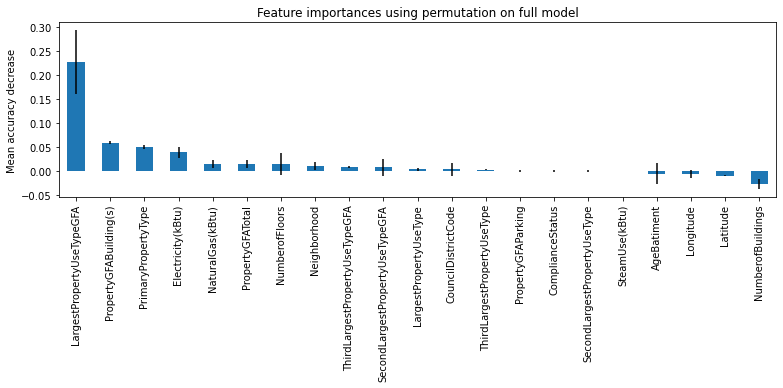

In [54]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()

result = permutation_importance(
    pic_gradient_search2, X_test, y_test, n_repeats=30, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances2 = pd.Series(result.importances_mean, index=X_train.columns)
forest_importances2 = forest_importances2.sort_values(ascending= False)
fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(12
                    , 10.5)
plt.show()

# 2ème Partie : Avec EnergyStarScore

In [55]:
X_ess = df.drop(['log_SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],axis=1)
y_ess = df['TotalGHGEmissions']

In [56]:
X_ess_train, X_ess_test, y_ess_train, y_ess_test = train_test_split(X_ess, y_ess,test_size=0.2,random_state=0)

In [57]:
X_ess_train.shape

(1319, 22)

In [58]:
X_ess_test.shape

(330, 22)

In [59]:
X_ess_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,NaN,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,69.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,NaN,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,67.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,NaN,0.0,0.0,1.0,Compliant,61


#### Imputation des valeurs manquantes pour l'EnergyStarScore

In [60]:
ess_train_median = X_ess_train['ENERGYSTARScore'].median() 
ess_train_median

73.0

In [61]:
X_ess_train['ENERGYSTARScore'].fillna(ess_train_median, inplace = True)

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [62]:
scaler.fit_transform(X_ess_train['ENERGYSTARScore'].values.reshape(-1, 1))

array([[ 0.21275608],
       [ 0.03966416],
       [ 0.21275608],
       ...,
       [ 0.64548586],
       [-1.86434688],
       [-0.65270349]])

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


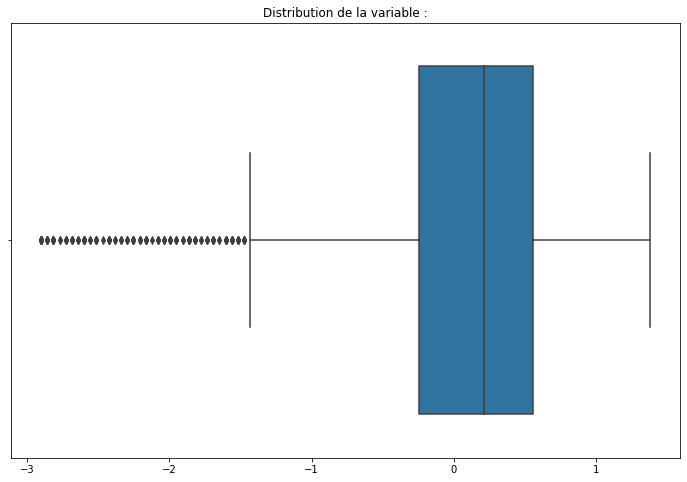

In [63]:
plt.figure(figsize = (12,8))
sns.boxplot(scaler.fit_transform(X_ess_train['ENERGYSTARScore'].values.reshape(-1, 1)))
    
plt.title('Distribution de la variable :')

plt.show()
sns.set(font_scale=1)


In [64]:
X_ess_train['ENERGYSTARScore'].value_counts()

73.0     461
89.0      24
95.0      23
100.0     23
98.0      23
83.0      21
97.0      21
91.0      21
80.0      18
69.0      17
94.0      17
92.0      17
79.0      17
93.0      16
88.0      16
57.0      16
77.0      16
75.0      16
87.0      15
96.0      15
1.0       15
72.0      14
99.0      14
78.0      14
71.0      13
67.0      13
86.0      13
90.0      13
82.0      12
55.0      12
85.0      12
56.0      11
62.0      11
58.0      10
37.0       9
66.0       9
49.0       9
84.0       9
81.0       9
76.0       8
43.0       8
63.0       8
53.0       8
3.0        8
65.0       8
60.0       7
64.0       7
2.0        7
8.0        7
16.0       7
61.0       7
70.0       6
38.0       6
29.0       6
51.0       6
25.0       6
54.0       6
31.0       6
32.0       6
12.0       6
18.0       6
33.0       5
50.0       5
74.0       5
59.0       5
6.0        5
47.0       5
45.0       5
44.0       5
68.0       5
10.0       5
46.0       4
48.0       4
5.0        4
17.0       4
40.0       4
35.0       4

In [65]:
X_ess_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,73.0,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,69.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,73.0,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,67.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,73.0,0.0,0.0,1.0,Compliant,61


In [66]:
X_ess_test['ENERGYSTARScore'].fillna(ess_train_median, inplace = True)

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [67]:
# Encodage/scaling de nos données en fonction de leur type


col_num_int2 = list(X_ess.select_dtypes(include=["int64"]))
col_num_float2 = list(X_ess.select_dtypes(include=["float64"]))
col_cat2 = list(X_ess.select_dtypes(include=["object"]))



ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()
col_num_int_pipe = Pipeline(steps = [('scaler', scaler)])

col_cat_pipe = Pipeline(steps = [('OneHot', ohe)])


preprocessor2 = ColumnTransformer(transformers=[('ints', col_num_int_pipe, col_num_int2),
       ('floats', col_num_int_pipe, col_num_float2),
       ('category', col_cat_pipe, col_cat2)])


# Création des pipelines pour chacun des modèles testés

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
svr2 = Pipeline(steps=[('preprocessing',preprocessor2),('SVR',SVR())])
elastic2 = Pipeline(steps=[('preprocessing',preprocessor2),('elastic', ElasticNet())])
linear_reg2 = Pipeline(steps=[('preprocessing',preprocessor2),('linear_reg',linear_model.LinearRegression())])
ridge_reg2 = Pipeline(steps=[('preprocessing',preprocessor2),('ridge_reg', Ridge())])
rfr2 = Pipeline(steps=[('preprocessing',preprocessor2),('RFR',RandomForestRegressor(random_state=0))])
knn2 = Pipeline(steps=[('preprocessing',preprocessor2),('kNN',KNeighborsRegressor())])
ada2 = Pipeline(steps=[('preprocessing',preprocessor2),('ADA',AdaBoostRegressor(random_state=0,))])
dummy2 = Pipeline(steps=[('preprocessing',preprocessor2),('dummy',DummyRegressor(strategy='mean'))])

In [68]:
gradient2 = Pipeline(steps=[('preprocessing',preprocessor2),('GradientBoosting', GradientBoostingRegressor())])

## Recherche des hyperparamètres optimaux pour chacune des catégories de modèles

#### ElasticNet

In [69]:
parameters_ess_elastic = {'elastic__tol' : [0.1,0.01,0.001,0.0001], #seuil de tolérance de modification des poids pour que 
                                                       #l'algorithme converge
              "elastic__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #poids du terme de pénalité
              "elastic__l1_ratio": [0, 0.2,0.4,0.6,0.8,1]} #0 = Ridge / 1= Lasso
elastic_ess_search = GridSearchCV(elastic2,
                               param_grid = parameters_ess_elastic,
                              scoring= 'neg_mean_squared_error',
                              verbose=3,
                               cv=5)

elastic_ess_search_cv = elastic_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour le ElasticNet_ess sont: {}".format(elastic_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(elastic_ess_search_cv.best_score_))

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-200839.343 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61985913.99833113, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-92839.353 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52666929.66750001, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1841952.366 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-426902.651 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61834639.580980636, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-161858.137 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50304620.09843214, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-201450.819 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61985913.99833113, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-92839.353 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52666929.66750001, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1841952.366 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30007372.85263103, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-430341.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61834639.580980636, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-161858.137 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50304620.09843214, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-201450.819 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61985913.99833113, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-92839.353 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52666929.66750001, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1841952.366 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30007372.85263103, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-430341.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61834639.580980636, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-161858.137 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50304620.09843214, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-201450.819 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61985913.99833113, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-92839.353 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52666929.66750001, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1841952.366 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30007372.85263103, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-430341.561 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61834639.580980636, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-161858.137 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-202622.946 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61673333.23467684, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-93378.762 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52326877.74350359, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1844351.809 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-427111.055 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61625816.387058824, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-162029.625 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49980082.70323486, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-202545.273 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61673333.23467684, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-93378.762 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52326877.74350359, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1844351.809 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29736381.24718691, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-430864.295 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61625816.387058824, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-162029.625 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49980082.70323486, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-202545.273 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61673333.23467684, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-93378.762 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52326877.74350359, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1844351.809 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29736381.24718691, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-430864.295 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61625816.387058824, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-162029.625 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49980082.70323486, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-202545.273 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61673333.23467684, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-93378.762 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52326877.74350359, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1844351.809 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29736381.24718691, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-430864.295 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61625816.387058824, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-162029.625 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-204376.447 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61302648.559135266, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-93937.832 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51922145.20724136, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1847057.218 total time=   0.6s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-420700.539 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61369032.54886745, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-162233.408 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49611385.25438944, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-203705.251 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61302648.559135266, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-93937.832 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51922145.20724136, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1847057.218 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29428783.110586766, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-431461.811 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61369032.54886745, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-162233.408 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49611385.25438944, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-203705.251 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61302648.559135266, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-93937.832 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51922145.20724136, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1847057.218 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29428783.110586766, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-431461.811 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61369032.54886745, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-162233.408 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49611385.25438944, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-203705.251 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61302648.559135266, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-93937.832 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51922145.20724136, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1847057.218 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29428783.110586766, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-431461.811 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61369032.54886745, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-162233.408 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-203290.057 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60776473.297816806, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-94516.790 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51494392.22183038, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1850085.417 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-420876.672 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60992070.59851877, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-162472.038 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49182785.29493868, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-204941.684 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60776473.297816806, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-94516.790 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51494392.22183038, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1850085.417 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29042638.878730115, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-432141.477 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60992070.59851877, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-162472.038 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49182785.29493868, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-204941.684 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60776473.297816806, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-94516.790 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51494392.22183038, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1850085.417 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29042638.878730115, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-432141.477 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60992070.59851877, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-162472.038 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49182785.29493868, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-204941.684 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60776473.297816806, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-94516.790 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51494392.22183038, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1850085.417 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29042638.878730115, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-432141.477 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60992070.59851877, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-162472.038 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-199859.535 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60415326.876726754, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-95126.058 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51157370.96219937, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1853387.319 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-421089.886 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60094128.35455201, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-162671.843 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48830894.09374734, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-206258.738 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60415326.876726754, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-95126.058 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51157370.96219937, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1853387.319 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28403506.73365551, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-432887.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60094128.35455201, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-162671.843 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48830894.09374734, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-206258.738 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60415326.876726754, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-95126.058 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51157370.96219937, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1853387.319 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28403506.73365551, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-432887.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60094128.35455201, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-162671.843 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48830894.09374734, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-206258.738 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60415326.876726754, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-95126.058 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51157370.96219937, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1853387.319 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28403506.73365551, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-432887.528 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60094128.35455201, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-162671.843 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-196662.490 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56859389.153746195, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-96009.030 total time=   0.6s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1856710.767 total time=   0.1s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-421343.303 total time=   0.0s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-163372.222 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46243370.314649664, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-207365.958 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56859389.153746195, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-96009.030 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16003508.125047415, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1856667.750 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24833289.709218845, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-433405.059 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51441610.905125335, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-163372.314 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46243370.314649664, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-207365.958 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56859389.153746195, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-96009.030 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16003508.125047415, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1856667.750 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24833289.709218845, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-433405.059 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51441610.905125335, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-163372.314 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46243370.314649664, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-207365.958 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56859389.153746195, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-96009.030 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16003508.125047415, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1856667.750 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24833289.709218845, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-433405.059 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51441610.905125335, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-163372.314 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58500702.76410948, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-178443.461 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69731591.42604738, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-79091.699 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59443609.70318952, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1856641.699 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36105752.52111167, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-431799.573 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66296003.05507466, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-163500.865 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58500702.76410948, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-178443.461 total time=   0.7s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69731591.42604738, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-79091.699 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59443609.70318952, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1856641.699 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36105752.52111167, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-431799.573 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66296003.05507466, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-163500.865 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58500702.76410948, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-178443.461 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69731591.42604738, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-79091.699 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59443609.70318952, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1856641.699 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36105752.52111167, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-431799.573 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66296003.05507466, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-163500.865 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58500702.76410948, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-178443.461 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69731591.42604738, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-79091.699 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59443609.70318952, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1856641.699 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36105752.52111167, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-431799.573 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66296003.05507466, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-163500.865 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56853036.26335701, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-181437.539 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68043039.50053905, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-81187.160 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57843671.42630143, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1843519.664 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34559067.38562141, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-429744.631 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65212581.74509425, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-162379.686 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56853036.26335701, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-181437.539 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68043039.50053905, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-81187.160 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57843671.42630143, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1843519.664 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34559067.38562141, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-429744.631 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65212581.74509425, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-162379.686 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56853036.26335701, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-181437.539 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68043039.50053905, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-81187.160 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57843671.42630143, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1843519.664 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34559067.38562141, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-429744.631 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65212581.74509425, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-162379.686 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56853036.26335701, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-181437.539 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68043039.50053905, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-81187.160 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57843671.42630143, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1843519.664 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34559067.38562141, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-429744.631 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65212581.74509425, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-162379.686 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55090178.6534784, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-185149.851 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66260713.074990846, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-83633.614 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56202287.16712155, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1833507.975 total time=   0.6s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-428385.069 total time=   0.3s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64096856.86488644, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-161504.249 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55090178.6534784, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-185149.851 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66260713.074990846, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-83633.614 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56202287.16712155, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1833507.975 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33138561.23956972, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-428202.785 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64096856.86488644, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-161504.249 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55090178.6534784, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-185149.851 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66260713.074990846, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-83633.614 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56202287.16712155, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1833507.975 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33138561.23956972, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-428202.785 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64096856.86488644, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-161504.249 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55090178.6534784, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-185149.851 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66260713.074990846, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-83633.614 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56202287.16712155, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1833507.975 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33138561.23956972, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-428202.785 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64096856.86488644, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-161504.249 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-189911.346 total time=   0.3s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64247048.74305479, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-86586.647 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54309635.32400353, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1828730.599 total time=   0.5s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-438018.679 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62830873.338660434, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-161021.299 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53084523.68064866, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-189970.308 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64247048.74305479, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-86586.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54309635.32400353, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1828730.599 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31578263.71433229, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-427532.717 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62830873.338660434, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-161021.299 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53084523.68064866, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-189970.308 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64247048.74305479, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-86586.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54309635.32400353, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1828730.599 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31578263.71433229, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-427532.717 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62830873.338660434, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-161021.299 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53084523.68064866, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-189970.308 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64247048.74305479, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-86586.647 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54309635.32400353, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1828730.599 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31578263.71433229, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-427532.717 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62830873.338660434, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-161021.299 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-194823.925 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61560943.86104853, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-90363.219 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51573830.399990834, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1833279.767 total time=   0.6s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-426530.039 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61024128.98902978, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-161211.778 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50477434.42434173, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-196714.232 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61560943.86104853, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-90363.219 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51573830.399990834, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1833279.767 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29456177.81872776, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-428534.807 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61024128.98902978, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-161211.778 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50477434.42434173, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-196714.232 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61560943.86104853, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-90363.219 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51573830.399990834, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1833279.767 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29456177.81872776, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-428534.807 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61024128.98902978, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-161211.778 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50477434.42434173, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-196714.232 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61560943.86104853, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-90363.219 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51573830.399990834, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1833279.767 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29456177.81872776, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-428534.807 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61024128.98902978, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-161211.778 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-196635.458 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-95906.267 total time=   0.4s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1856393.569 total time=   0.1s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-421342.839 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-163253.674 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28623501.180557735, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-207312.918 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32350636.213654675, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-95908.707 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7347646.30175814, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1856008.263 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9360372.707557816, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-433258.046 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16767549.400488175, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-163299.349 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28623501.180557735, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-207312.918 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32350636.213654675, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-95908.707 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7347646.30175814, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1856008.263 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9360372.707557816, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-433258.046 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16767549.400488175, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-163299.349 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28623501.180557735, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-207312.918 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32350636.213654675, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-95908.707 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7347646.30175814, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1856008.263 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9360372.707557816, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-433258.046 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16767549.400488175, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-163299.349 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87186848.24916, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-154155.431 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98626477.40951043, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-60269.052 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79683863.55099617, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2428432.142 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53182200.880723655, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-540688.578 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84314966.41907743, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-219592.429 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87186848.24916, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-154155.431 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98626477.40951043, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-60269.052 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79683863.55099617, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2428432.142 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53182200.880723655, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-540688.578 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84314966.41907743, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-219592.429 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87186848.24916, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-154155.431 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98626477.40951043, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-60269.052 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79683863.55099617, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2428432.142 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53182200.880723655, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-540688.578 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84314966.41907743, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-219592.429 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87186848.24916, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-154155.431 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98626477.40951043, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-60269.052 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79683863.55099617, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2428432.142 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53182200.880723655, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-540688.578 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84314966.41907743, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-219592.429 total time=   0.5s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-154899.469 total time=   0.2s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-60113.332 total time=   0.2s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2342846.028 total time=   0.1s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-522069.951 total time=   0.2s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-210189.707 total time=   0.2s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-154899.134 total time=   0.2s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-60112.012 total time=   0.2s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2342918.75

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22469494.00553471, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-168852.840 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25946896.12910603, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-71483.848 total time=   0.5s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1938205.213 total time=   0.5s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-445393.433 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20084716.993026525, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-170495.979 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22469494.00553471, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-168852.840 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25946896.12910603, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-71483.848 total time=   0.5s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1938234.039 total time=   0.6s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-445367.092 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20084716.993026525, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-170495.979 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22469494.00553471, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-168852.840 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25946896.12910603, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-71483.848 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298956.51595662534, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1938258.213 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214683.85621792078, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-445366.009 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20084716.993026525, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-170495.979 total time=   0.5s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-196382.687 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-94701.762 total time=   0.2s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1853404.946 total time=   0.0s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-421340.965 total time=   0.0s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-162559.480 total time=   0.2s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.01;, score=-206727.849 total time=   0.5s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.01;, score=-94926.244 total time=   0.5s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1850679.871 total time= 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922314.3583626, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-206730.550 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749177.1557088196, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-94926.742 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2509350.159136474, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1850528.714 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1399733.501570329, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-432730.735 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419455.8851103336, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.001;, score=-162704.667 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922314.3583626, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-206730.550 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2749177.1557088196, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-94926.742 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2509350.159136474, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1850528.714 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1399733.501570329, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-432730.735 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419455.8851103336, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-162704.667 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125121845.81129204, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-163871.090 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135067107.11182153, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-88603.620 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111147288.91543254, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2592497.943 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69587735.56172109, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-704690.554 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113773236.74687698, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-279480.918 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125121845.81129204, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-163871.090 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135067107.11182153, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-88603.620 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111147288.91543254, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2592497.943 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69587735.56172109, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-704690.554 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113773236.74687698, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-279480.918 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125121845.81129204, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-163871.090 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135067107.11182153, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-88603.620 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111147288.91543254, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2592497.943 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69587735.56172109, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-704690.554 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113773236.74687698, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-279480.918 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125121845.81129204, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-163871.090 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135067107.11182153, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-88603.620 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111147288.91543254, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2592497.943 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69587735.56172109, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-704690.554 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113773236.74687698, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-279480.918 total time=   0.5s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-163116.918 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-85881.691 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2673254.208 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-694556.540 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-280085.241 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-163115.975 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-85883.685 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2673709.805 total t

[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-2664251.972 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-602150.591 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-249286.145 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-155153.410 total time=   0.1s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-65750.929 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2664778.872 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-602161.194 total time=   0.1s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-249287.484 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-20

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85583.1994511038, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-200592.220 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92190.39791634679, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-87465.836 total time=   0.5s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1803514.927 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138784.86188544333, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-429689.746 total time=   0.5s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-155571.039 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165977699.56826636, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-175674.234 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176060829.54939574, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-110917.740 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154665522.36373353, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-706485.158 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92993031.84944636, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-788448.836 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158676653.52933985, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-243718.030 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165977699.56826636, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-175674.234 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176060829.54939574, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-110917.740 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154665522.36373353, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-706485.158 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92993031.84944636, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-788448.836 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158676653.52933985, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-243718.030 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165977699.56826636, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-175674.234 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176060829.54939574, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-110917.740 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154665522.36373353, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-706485.158 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92993031.84944636, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-788448.836 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158676653.52933985, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-243718.030 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165977699.56826636, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-175674.234 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176060829.54939574, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-110917.740 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154665522.36373353, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-706485.158 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92993031.84944636, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-788448.836 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158676653.52933985, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-243718.030 total time=   0.6s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-172898.708 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-108435.828 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-905003.974 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-779252.586 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-245236.674 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-172891.599 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-108435.610 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-905124.479 total time=   0.0s
[CV 4/

[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-269350.889 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-166144.501 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-96129.076 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2159807.804 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-733776.344 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-269353.425 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-176076.737 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-78352.557 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1701298.957 total time=   0.0s

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401523.45240290463, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.001;, score=-439083.759 total time=   0.4s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.001;, score=-143187.951 total time=   0.1s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-175706.997 total time=   0.2s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-75742.883 total time=   0.2s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1633764.743 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401523.45240290463, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-439083.759 total time=   0.3s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-143205.298 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231378812.315708, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-236273.737 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244664782.1485614, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-146770.065 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210079884.0410269, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-129283.663 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141938676.40802935, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-929646.963 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228617184.87171334, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-267703.584 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231378812.315708, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-236273.737 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244664782.1485614, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-146770.065 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210079884.0410269, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-129283.663 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141938676.40802935, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-929646.963 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228617184.87171334, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-267703.584 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231378812.315708, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-236273.737 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244664782.1485614, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-146770.065 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210079884.0410269, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-129283.663 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141938676.40802935, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-929646.963 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228617184.87171334, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-267703.584 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231378812.315708, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-236273.737 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244664782.1485614, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-146770.065 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210079884.0410269, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-129283.663 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141938676.40802935, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-929646.963 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228617184.87171334, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-267703.584 total time=   0.6s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-229926.188 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-143602.787 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-94231.094 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-916689.169 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-264464.466 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-229900.403 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-143590.030 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-94093.464 total time=   0.0s

[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-832842.303 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-247187.269 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-160054.124 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-58457.021 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1911919.861 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-613704.159 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-191573.020 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-157719.413 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-57856.555 total time=   0.0s
[CV 3/5]

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260036214.88126504, tolerance: 52894957.15489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-278150.733 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274905387.6316483, tolerance: 55919224.53490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-167431.211 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230447091.69579244, tolerance: 46707569.76572507
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-452128.447 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163994243.3687483, tolerance: 33481504.977057543
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1007992.160 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258922952.8197924, tolerance: 52724332.77646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-289627.780 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260036214.88126504, tolerance: 5289495.715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-278150.733 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274905387.6316483, tolerance: 5591922.453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-167431.211 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230447091.69579244, tolerance: 4670756.976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-452128.447 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163994243.3687483, tolerance: 3348150.497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1007992.160 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258922952.8197924, tolerance: 5272433.27764649
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-289627.780 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260036214.88126504, tolerance: 528949.5715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-278150.733 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274905387.6316483, tolerance: 559192.2453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-167431.211 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230447091.69579244, tolerance: 467075.6976572506
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-452128.447 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163994243.3687483, tolerance: 334815.0497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1007992.160 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258922952.8197924, tolerance: 527243.3277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-289627.780 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260036214.88126504, tolerance: 52894.95715489787
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-278150.733 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274905387.6316483, tolerance: 55919.22453490745
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-167431.211 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230447091.69579244, tolerance: 46707.569765725064
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-452128.447 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163994243.3687483, tolerance: 33481.50497705754
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1007992.160 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258922952.8197924, tolerance: 52724.33277646491
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-289627.780 total time=   0.5s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-277192.210 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-167056.786 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-441535.134 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1006303.773 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-289231.803 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-277190.695 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-167055.938 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-441527.481 total 

[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-311888.745 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-982122.633 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-282054.642 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-262444.363 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-160394.918 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-311888.745 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-982122.633 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-282054.642 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-198

In [70]:
# Récupèration du score r2 à partir de la grille optimale
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_elastic_opti = {key :[value] for key,value in elastic_ess_search_cv.best_params_.items()}
parameters_ess_elastic_opti



start_time6 = time.time()

elastic_ess_search_opti = GridSearchCV(elastic2,
                               param_grid = parameters_ess_elastic_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

elastic_ess_search_r2 = elastic_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time6 = time.time() - start_time6
print(f"Elapsed time to compute the importances: {elapsed_time6:.3f} seconds")
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(elastic_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(elastic_ess_search_r2.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.265 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.222 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.897 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.144 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=0.128 total time=   0.0s
Elapsed time to compute the importances: 0.132 seconds
Les meilleurs hyper-paramètres pour le ElasticNet sont: {'elastic__alpha': 10, 'elastic__l1_ratio': 0.6, 'elastic__tol': 0.01}
Le meilleur score est 0.3311660998871222


In [71]:
%%time
y_pred_elastic = elastic_ess_search_r2.predict(X_ess_train)

Wall time: 7.98 ms


In [72]:
start_elastic_ess = time.time()
y_pred = elastic_ess_search_r2.predict(X_ess_train)
end_elastic_ess = time.time()

predict_time_elastic_ess = end_elastic_ess - start_elastic_ess

In [73]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['ElasticNet_ess'],
    'Score_RMSE' : [np.sqrt(-elastic_ess_search_cv.best_score_)],
    'Score_R2' : [elastic_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time6],
    'TempsPrédictionOpti': [predict_time_elastic_ess]}),
              ignore_index=True)


In [74]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946


#### RandomForestRegressor

In [75]:
parameters_ess_rfr = {'RFR__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'RFR__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'RFR__max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}
    
rfr_ess_search = GridSearchCV(rfr2,
                               param_grid = parameters_ess_rfr,
                              verbose=3,
                              scoring = 'neg_mean_squared_error',
                               cv=5)

rfr_ess_search_cv = rfr_ess_search.fit(X_ess_train, y_ess_train)

print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(rfr_ess_search_cv.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-125036.746 total time=   0.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-27817.130 total time=   0.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-270920.545 total time=   0.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-386313.062 total time=   0.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-150158.235 total time=   0.2s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-129221.026 total time=   1.3s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-25564.223 total time=   1.3s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, s

[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=300;, score=-290427.306 total time=   3.9s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=300;, score=-577493.867 total time=   3.8s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=300;, score=-146489.647 total time=   3.9s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-141610.596 total time=   6.4s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-35867.251 total time=   6.4s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-291129.040 total time=   6.6s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-590540.555 total time=   6.5s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-142749.234 total time=   6.5s
[CV 1/5] END RFR_

[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-132299.449 total time=   0.2s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-53842.534 total time=   0.2s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-338369.176 total time=   0.2s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-621902.510 total time=   0.2s
[CV 5/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=100;, score=-172081.363 total time=   0.2s
[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-128277.624 total time=   0.7s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-52040.817 total time=   0.7s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-311145.342 total time=   0.7s
[CV 4/5] END RFR__

In [76]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_rfr_opti = {key :[value] for key,value in rfr_ess_search_cv.best_params_.items()}
parameters_ess_rfr_opti


start_time7 = time.time()


rfr_ess_search_opti = GridSearchCV(rfr2,
                               param_grid = parameters_ess_rfr_opti,
                              verbose=3,
                              scoring = 'r2',
                               cv=5)

rfr_ess_search_r2 = rfr_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time7 = time.time() - start_time7
print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(rfr_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time7:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.562 total time=   0.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.837 total time=   0.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.479 total time=   0.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.621 total time=   0.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=0.485 total time=   0.2s
Les meilleurs hyper-paramètres pour le RFR sont: {'RFR__max_features': 'auto', 'RFR__min_samples_leaf': 1, 'RFR__n_estimators': 10}
Le meilleur score est 0.5969254393766154
Elapsed time to compute the importances: 1.891 seconds


In [77]:
start_rfr_ess = time.time()
y_pred = rfr_ess_search_r2.predict(X_ess_train)
end_rfr_ess = time.time()

predict_time_rfr_ess = end_rfr_ess - start_rfr_ess

In [78]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['RandomForestReg_ess'],
    'Score_RMSE' : [np.sqrt(-rfr_ess_search_cv.best_score_)],
    'Score_R2' : [rfr_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time7],
    'TempsPrédictionOpti':[predict_time_rfr_ess]}),
              ignore_index=True)

In [79]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946
7,RandomForestReg_ess,438.234120,0.596925,1.891296,0.015957


In [80]:
import pickle
pickle.dump(rfr_ess_search_r2, open('rfr_ess_search_r2_emissions.pickle', 'wb'))
pic_rfr_ess_search2 = pickle.load(open('rfr_ess_search_r2_emissions.pickle', 'rb'))

#### SupportVectorRegressor

In [81]:
parameters_ess_svr = {'SVR__gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 
              'SVR__epsilon' : [0.001, 0.01, 0.1, 1], #erreur acceptée par l'algorithme
              'SVR__C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation
svr_ess_search = GridSearchCV(svr2, 
                      param_grid = parameters_ess_svr,
                      cv=5,
                        scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

svr_ess_search_cv = svr_ess_search.fit(X_ess_train, y_ess_train)

print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(svr_ess_search_cv.best_score_))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-307632.814 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-186904.401 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-537087.273 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-1044977.698 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-307632.814 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-186904.401 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-537087.272 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1044977.698 total time=   0.0s
[CV 5/5]

[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-307640.296 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-186900.619 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-537074.200 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-1044971.404 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-307640.296 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-186900.619 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-537074.199 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1044971.404 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-301371.224 total t

[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-537087.272 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-1044977.698 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-307632.813 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-186904.400 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-537087.263 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1044977.696 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-301371.223 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-307632.804 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-186904.3

[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-1044971.404 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-301371.224 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-307640.295 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-186900.619 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-537074.190 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1044971.401 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-301371.223 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-307640.281 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-186900.616 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-537074.094 total time=   0.0

[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-186904.392 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-537087.167 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1044977.673 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-301371.219 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-307632.710 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-186904.306 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-537086.219 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-1044977.440 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-301371.173 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-307631.773 total t

[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1044971.379 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-301371.219 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-307640.140 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-186900.590 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-537073.134 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-1044971.158 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-301371.173 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-307638.739 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-186900.330 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-537064.829 total time=   0.0s
[CV 4/5]

[CV 3/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-537076.735 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-1044975.119 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-301370.712 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-307622.398 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-186894.925 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-536994.785 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-1044951.963 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-301366.120 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-307497.588 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-186836.038 total time=   0.0s
[CV 3/

[CV 2/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-186897.726 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-536980.495 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-1044946.875 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-301366.142 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-307488.414 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-186837.242 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-536727.508 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-1044742.293 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-301294.139 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-306283.624 total time=   0.0s
[CV 2/5] END SVR__C=1, 

[CV 2/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-186041.091 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-533408.811 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-1042643.889 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-300543.105 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-296661.549 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-180286.812 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-522829.773 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-1026575.158 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-295352.434 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-274219.443 total time=   

[CV 5/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-300551.672 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-296661.958 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-180281.638 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-522854.053 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-1026552.161 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-295339.071 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-274215.749 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-164892.248 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-505306.636 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-994716.572 total time=   0.0s
[CV 5/5] END SVR__C=10

In [82]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_svr_opti = {key :[value] for key,value in svr_ess_search_cv.best_params_.items()}
parameters_ess_svr_opti


start_time8 = time.time()


svr_ess_search_opti = GridSearchCV(svr2, 
                      param_grid = parameters_ess_svr_opti,
                      cv=5,
                        scoring = 'r2',
                   verbose=3
                     )

svr_ess_search_r2 = svr_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time8 = time.time() - start_time8
print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(svr_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time8:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=0.039 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=0.036 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=0.028 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=0.025 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.001, SVR__gamma=0.01;, score=0.040 total time=   0.0s
Les meilleurs hyper-paramètres pour la SVR sont: {'SVR__C': 10, 'SVR__epsilon': 0.001, 'SVR__gamma': 0.01}
Le meilleur score est 0.03345342108960973
Elapsed time to compute the importances: 0.738 seconds


In [83]:
start_svr_ess = time.time()
y_pred = svr_ess_search_r2.predict(X_ess_train)
end_svr_ess = time.time()

predict_time_svr_ess = end_svr_ess - start_svr_ess

In [84]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['SupportVectorReg_ess'],
    'Score_RMSE' : [np.sqrt(-svr_ess_search_cv.best_score_)],
    'Score_R2' : [svr_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time8],
    'TempsPrédictionOpti' :[predict_time_svr_ess]}),
              ignore_index=True)

In [85]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946
7,RandomForestReg_ess,438.234120,0.596925,1.891296,0.015957
8,SupportVectorReg_ess,666.229089,0.033453,0.738014,0.113359


#### Adaboost

In [86]:
X_ess_train.shape

(1319, 22)

In [87]:
X_train.shape

(1319, 21)

In [88]:
parameters_ess_ada = {"ADA__n_estimators": [20,30,50,70],
              "ADA__learning_rate": [0.5, 1, 2, 3],
              "ADA__loss": ['linear', 'square', 'exponential'], 
              }
ada_ess_search = GridSearchCV(ada2, 
                      param_grid = parameters_ess_ada,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

ada_ess_search_cv = ada_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(ada_ess_search_cv.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-191625.298 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-62625.887 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-351081.781 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-799895.626 total time=   0.0s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-130167.617 total time=   0.0s
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-191717.907 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-71492.119 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-293175.651 total time=   0.0s
[CV 4/5] END ADA__le

[CV 2/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-83182.822 total time=   0.1s
[CV 3/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-376003.507 total time=   0.1s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-948794.804 total time=   0.1s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=50;, score=-189933.255 total time=   0.1s
[CV 1/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-238257.297 total time=   0.1s
[CV 2/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-112641.753 total time=   0.2s
[CV 3/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-376003.507 total time=   0.1s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-948794.804 total time=   0.1s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-262377.426 tot

[CV 1/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-950794.178 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-162035.746 total time=   0.0s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-184557.233 total time=   0.0s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-887916.735 total time=   0.0s
[CV 5/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=30;, score=-377510.638 total time=   0.0s
[CV 1/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-241499.313 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-180265.234 total time=   0.0s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-184425.374 total time=   0.0s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-887903.637 to

[CV 4/5] END ADA__learning_rate=3, ADA__loss=square, ADA__n_estimators=70;, score=-1037526.762 total time=   0.1s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=square, ADA__n_estimators=70;, score=-1135214.587 total time=   0.1s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-210967.914 total time=   0.0s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-136834.856 total time=   0.0s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-416720.060 total time=   0.0s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-1002705.242 total time=   0.0s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=20;, score=-254916.285 total time=   0.0s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=30;, score=-228218.796 total time=   0.0s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__

In [89]:
parameters_ada_opti

{'ADA__learning_rate': [0.5],
 'ADA__loss': ['square'],
 'ADA__n_estimators': [30]}

In [90]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_ada_opti = {key :[value] for key,value in ada_ess_search_cv.best_params_.items()}
parameters_ess_ada_opti


start_time9 = time.time()


ada_ess_search_opti = GridSearchCV(ada2, 
                      param_grid = parameters_ess_ada_opti,
                      cv=5,
                          scoring = 'r2',
                   verbose=3
                     )

ada_ess_search_r2 = ada_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time9 = time.time() - start_time9
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(ada_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time9:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.324 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.684 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.832 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.329 total time=   0.0s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=square, ADA__n_estimators=30;, score=0.562 total time=   0.0s
Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {'ADA__learning_rate': 0.5, 'ADA__loss': 'square', 'ADA__n_estimators': 30}
Le meilleur score est 0.5462509240264035
Elapsed time to compute the importances: 0.843 seconds


In [91]:
start_ada_ess = time.time()
y_pred = ada_ess_search_r2.predict(X_ess_train)
end_ada_ess = time.time()

predict_time_ada_ess = end_ada_ess - start_ada_ess

In [92]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['Adaboost_ess'],
    'Score_RMSE' : [np.sqrt(-ada_ess_search_cv.best_score_)],
    'Score_R2' : [ada_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time9],
    'TempsPrédictionOpti': [predict_time_ada_ess]}),
              ignore_index=True)

In [93]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946
7,RandomForestReg_ess,438.234120,0.596925,1.891296,0.015957
8,SupportVectorReg_ess,666.229089,0.033453,0.738014,0.113359
9,Adaboost_ess,478.850887,0.546251,0.843177,0.016318


#### k-NearestNeighbours

In [94]:
parameters_ess_knn = {"kNN__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]
              }
knn_ess_search = GridSearchCV(knn2, 
                      param_grid = parameters_ess_knn,
                      cv=5,scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

knn_ess_search_cv = knn_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(knn_ess_search_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..........kNN__n_neighbors=2;, score=-431251.750 total time=   0.0s
[CV 2/5] END ...........kNN__n_neighbors=2;, score=-83605.873 total time=   0.0s
[CV 3/5] END ..........kNN__n_neighbors=2;, score=-135806.217 total time=   0.0s
[CV 4/5] END ..........kNN__n_neighbors=2;, score=-750748.495 total time=   0.0s
[CV 5/5] END ..........kNN__n_neighbors=2;, score=-347668.594 total time=   0.0s
[CV 1/5] END ..........kNN__n_neighbors=3;, score=-223544.493 total time=   0.0s
[CV 2/5] END ...........kNN__n_neighbors=3;, score=-78146.737 total time=   0.0s
[CV 3/5] END ..........kNN__n_neighbors=3;, score=-100495.843 total time=   0.0s
[CV 4/5] END ..........kNN__n_neighbors=3;, score=-811785.703 total time=   0.0s
[CV 5/5] END ..........kNN__n_neighbors=3;, score=-273497.026 total time=   0.0s
[CV 1/5] END ..........kNN__n_neighbors=4;, score=-211777.565 total time=   0.0s
[CV 2/5] END ...........kNN__n_neighbors=4;, scor

In [95]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_knn_opti = {key :[value] for key,value in knn_ess_search_cv.best_params_.items()}
parameters_ess_knn_opti


start_time10 = time.time()
knn_ess_search_opti = GridSearchCV(knn2, 
                      param_grid = parameters_ess_knn_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

knn_ess_search_r2 = knn_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time10 = time.time() - start_time10
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(knn_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time10:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................kNN__n_neighbors=3;, score=0.216 total time=   0.0s
[CV 2/5] END ................kNN__n_neighbors=3;, score=0.543 total time=   0.0s
[CV 3/5] END ................kNN__n_neighbors=3;, score=0.807 total time=   0.0s
[CV 4/5] END ................kNN__n_neighbors=3;, score=0.204 total time=   0.0s
[CV 5/5] END ................kNN__n_neighbors=3;, score=0.063 total time=   0.0s
Les meilleurs hyper-paramètres pour le k-NN sont: {'kNN__n_neighbors': 3}
Le meilleur score est 0.3665827539343572
Elapsed time to compute the importances: 0.194 seconds


In [96]:
start_knn_ess = time.time()
y_pred = knn_ess_search_r2.predict(X_ess_train)
end_knn_ess = time.time()

predict_time_knn_ess = end_knn_ess - start_knn_ess

In [97]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['KNN_ess'],
    'Score_RMSE' : [np.sqrt(-knn_ess_search_cv.best_score_)],
    'Score_R2' : [knn_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time10],
    'TempsPrédictionOpti' : [predict_time_knn_ess]}),
              ignore_index=True)

In [98]:
resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946
7,RandomForestReg_ess,438.234120,0.596925,1.891296,0.015957
8,SupportVectorReg_ess,666.229089,0.033453,0.738014,0.113359
9,Adaboost_ess,478.850887,0.546251,0.843177,0.016318


#### Gradient Boosting

In [99]:
parameters_ess_gradient = {'GradientBoosting__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'GradientBoosting__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'GradientBoosting__max_depth': [1, 2,3], #nombre de features observées pour chaque arbre
    'GradientBoosting__learning_rate' : [0.1, 0.5, 1, 2]
}

gradient_ess_search = GridSearchCV(gradient2, 
                      param_grid = parameters_ess_gradient,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

gradient_ess_search_cv = gradient_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour la modélisation GradientBoosting sont: {}".format(gradient_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(gradient_ess_search_cv.best_score_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-198441.532 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-105759.843 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-304785.797 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-766321.914 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-251223

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-379258.035 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-158594.958 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-222608.400 total time=   0.4s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-40968.659 total time=   0.5s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-277009.279 total time=   0.5s
[CV 4/5] END GradientBoosting__learn

[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-76012.396 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-264310.435 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-563781.863 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-164256.439 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-199727.813 total time=   0.2s
[CV 2/5] END GradientBoosting__

[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-153832.241 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-39346.814 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-232463.298 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-640805.709 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-94438.999 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_ra

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-607116.786 total time=   0.9s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-80367.737 total time=   0.9s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-191130.868 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-87863.923 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-322708.858 total time=   0.0s
[CV 4/5] END GradientBoosting__learni

[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-31779.310 total time=   0.7s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-446826.534 total time=   0.8s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-238020.361 total time=   0.7s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-126054.256 total time=   0.7s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-218165.187 total time=   1.3s
[CV 2/5] END GradientBoosting__learn

[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-148127.560 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-32968.278 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-162207.763 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-588778.002 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-134929.190 total time=   0.2s
[CV 1/5] END GradientBoosting__learn

[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-250698.248 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-38812.461 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-413508.059 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-493988.160 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-229949.988 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_r

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-436744.709 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-179917.696 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-244598.027 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-50219.665 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-256175.274 total time=   0.0s
[CV 4/5] END GradientBoosting__learning

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-133846.447 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-277657.458 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-619585.762 total time=   0.3s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-205081.947 total time=   0.3s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-217102.199 total time=   0.5s
[CV 2/5] END GradientBoosting_

[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-112753.073 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-53619.733 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-278476.836 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-321786.993 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-96440.607 total time=   0.1s
[CV 1/5] END GradientBoosting__learni

[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-133409.686 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-60765.756 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-154336.047 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-369059.974 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-113985.706 total time=   0.0s
[CV 1/5] END GradientBoosting__learn

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-198369.726 total time=   1.3s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-114619.731 total time=   1.3s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-140779.772 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-27979.898 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-260480.120 total time=   0.0s
[CV 4/5] END GradientBoosting__learning

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-62392.937 total time=   0.7s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-201901.200 total time=   0.7s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-759244.824 total time=   0.8s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-121797.527 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-172762.969 total time=   1.3s
[CV 2/5] END GradientBoosting__learn

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-420539.386 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-37266.648 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-766485.550 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-545354.679 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-328695.950 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-214002.714 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-42732.445 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-260905.640 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-458719.253 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-105283.757 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, Gra

[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-758773.500 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-227758.684 total time=   0.4s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-359475.423 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-37018.368 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-1165789.024 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1

[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-374395.213 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-1088339.734 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-103765.260 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-88888.868 total time=   0.9s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-58317.352 total time=   0.8s
[CV 3/5] END GradientBoosting__learning_rate=1

[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-85780.867 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-121855.565 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-495550.065 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-119332.289 total time=   0.1s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-136374.847 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_r

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-122843.329 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-40732.674 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-427806.595 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1455855.493 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-168734.531 total time=   0.1s
[CV 1/5] END GradientBoosting__learning_rate=1, Gr

[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-147149.992 total time=   1.3s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-178482.369 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-64263.729 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-118100.256 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-503694.314 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1

[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-519993.920 total time=   0.3s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-1021172.881 total time=   0.3s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-293222.019 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-285716.895 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-171028.110 total time=   0.5s
[CV 3/5] END GradientBoosting__learning_rate

[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-171028.110 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-519993.920 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-1021172.881 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-293222.019 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-285716.895 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-476563.655 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-226514.317 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-9959672.671 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-7443659.592 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-339063.660 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, 

[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-54023754.832 total time=   0.8s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-339063.660 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-302462.408 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-231537.247 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-620576.985 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2

[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-178035.828 total time=   0.4s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-519993.920 total time=   0.4s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1462883.577 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-308557.189 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-302469.201 total time=   0.8s
[CV 2/5] END GradientBoosting__learning

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-286627.979 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-131998.333 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-521551.044 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-22640219.808 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-293758.870 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rat

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-387340.812 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-286631.045 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-249872.192 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-522327.668 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-698259.259 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=

In [100]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_gradient_opti = {key :[value] for key,value in gradient_ess_search_cv.best_params_.items()}
parameters_ess_gradient_opti

    
start_time12 = time.time()
gradient_ess_search_opti = GridSearchCV(gradient2, 
                      param_grid = parameters_ess_gradient_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

gradient_ess_search_r2 = gradient_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time12 = time.time() - start_time12
print("Les meilleurs hyper-paramètres pour le GradientBoosting sont: {}".format(gradient_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(gradient_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time12:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.511 total time=   1.4s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.691 total time=   1.3s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.740 total time=   1.3s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.758 total time=   1.2s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.623 total time=   1.2s
L

In [103]:
start_gradient_ess = time.time()
y_pred = gradient_ess_search_r2.predict(X_ess_train)
end_gradient_ess = time.time()

predict_time_gradient_ess = end_gradient_ess - start_gradient_ess

In [104]:
resultats_ghg = resultats_ghg.append(pd.DataFrame({
    'Modèle' : ['GradientBoosting_ess'],
    'Score_RMSE' : [np.sqrt(-gradient_ess_search_cv.best_score_)],
    'Score_R2' : [gradient_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time12],
    'TempsPrédictionOpti': [predict_time_gradient_ess]}),
              ignore_index=True)

In [105]:

resultats_ghg

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,553.573640,0.325974,0.168242,0.008976
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
2,SVR,666.889687,0.030744,0.716894,0.107297
3,Adaboost,476.740485,0.520768,0.933824,0.019947
4,KNN,557.299705,0.344433,0.259064,0.116542
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946
7,RandomForestReg_ess,438.234120,0.596925,1.891296,0.015957
8,SupportVectorReg_ess,666.229089,0.033453,0.738014,0.113359
9,Adaboost_ess,478.850887,0.546251,0.843177,0.016318


In [106]:
resultats_ghg.sort_values(by ='Score_R2', ascending = False)

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
5,GradientBoosting,342.581274,0.678728,1.590990,0.009973
11,GradientBoosting_ess,369.970700,0.664589,8.573616,0.022469
1,RandomForestReg,406.245011,0.631799,1.816025,0.012964
7,RandomForestReg_ess,438.234120,0.596925,1.891296,0.015957
9,Adaboost_ess,478.850887,0.546251,0.843177,0.016318
3,Adaboost,476.740485,0.520768,0.933824,0.019947
10,KNN_ess,545.430069,0.366583,0.193969,0.103889
4,KNN,557.299705,0.344433,0.259064,0.116542
6,ElasticNet_ess,552.066859,0.331166,0.131999,0.008946
0,ElasticNet,553.573640,0.325974,0.168242,0.008976


In [107]:
resultats_ghg.loc[:,['Modèle','TempsPrédictionOpti']]

,Modèle,TempsPrédictionOpti
0,ElasticNet,0.008976
1,RandomForestReg,0.012964
2,SVR,0.107297
3,Adaboost,0.019947
4,KNN,0.116542
5,GradientBoosting,0.009973
6,ElasticNet_ess,0.008946
7,RandomForestReg_ess,0.015957
8,SupportVectorReg_ess,0.113359
9,Adaboost_ess,0.016318


In [108]:
resultats_ghg_RMSE_tri = resultats_ghg.sort_values(by ='Score_RMSE', ascending = True)

<AxesSubplot:xlabel='Modèle'>

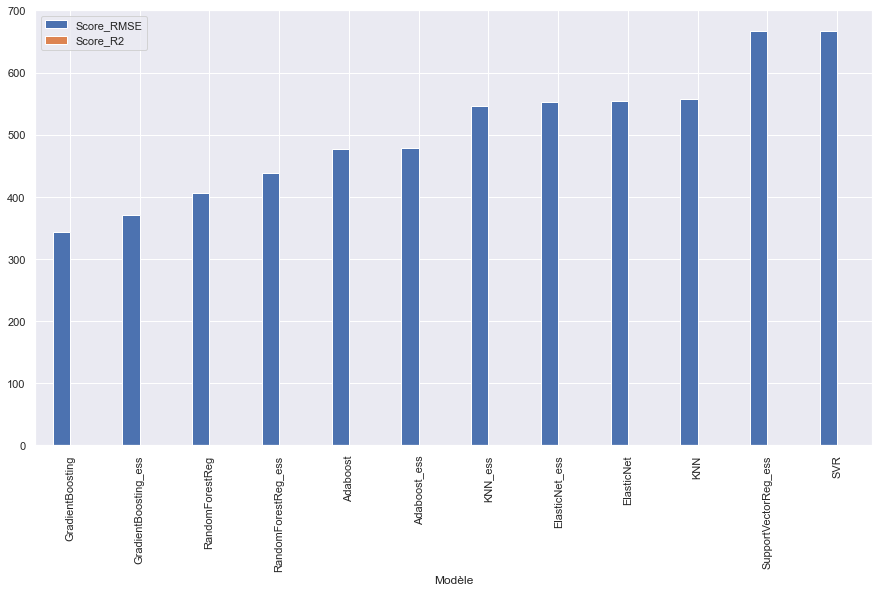

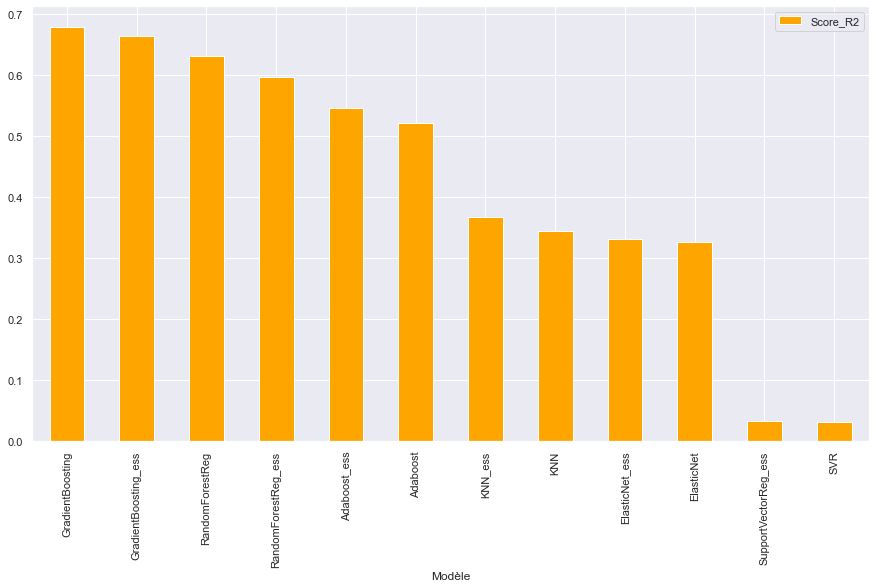

In [109]:
resultats_ghg_RMSE_tri = resultats_ghg.sort_values(by ='Score_RMSE', ascending = True)
resultats_ghg_RMSE_tri.plot(x = 'Modèle', y= ['Score_RMSE', 'Score_R2'], kind = 'bar', figsize =(15,8))
resultats_ghg_R2_tri = resultats_ghg.sort_values(by ='Score_R2', ascending = False)
resultats_ghg_R2_tri.plot(x = 'Modèle', y= ['Score_R2'], kind = 'bar', color ='orange', figsize =(15,8))

<AxesSubplot:xlabel='Modèle'>

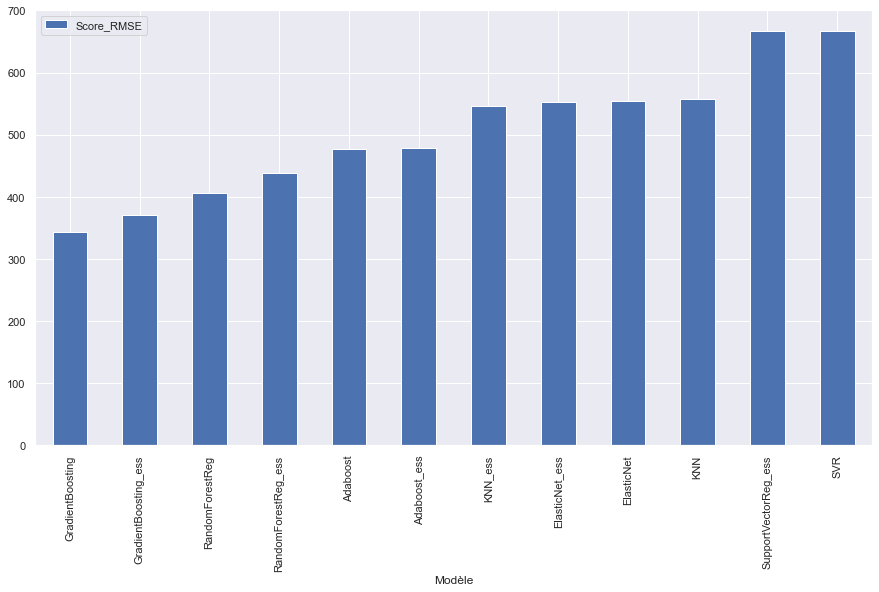

In [110]:

resultats_ghg_RMSE_tri.plot(x = 'Modèle', y= ['Score_RMSE'], kind = 'bar', figsize =(15,8))

In [111]:

resultats_ghg_R2_tri = resultats_ghg.sort_values(by ='Score_R2', ascending = False)


<AxesSubplot:xlabel='Modèle'>

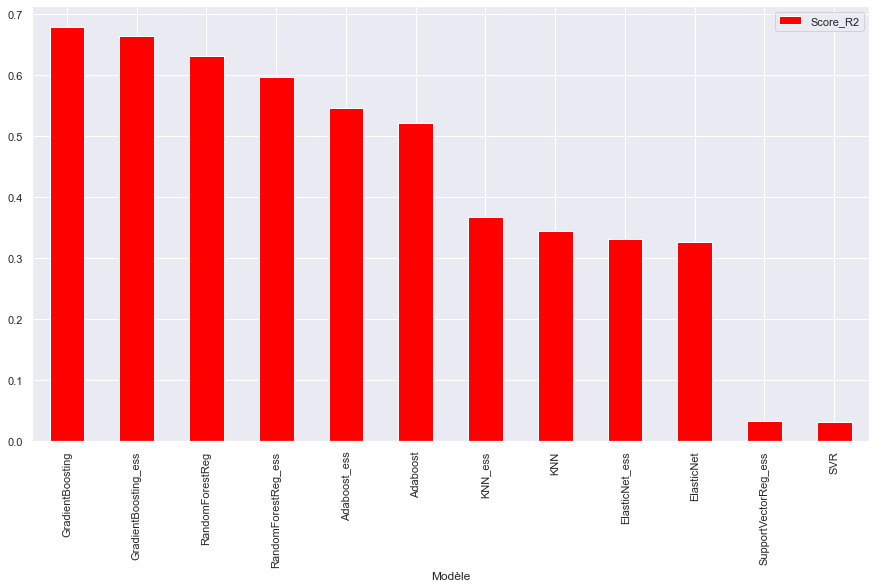

In [112]:
resultats_ghg_R2_tri.plot(x = 'Modèle', y= ['Score_R2'], kind = 'bar', color ='red', figsize =(15,8))

##### La modélisation par RandomForestRegressor, avec les hypermparamètres déterminés par CV, est toujours la plus performante et performe un peu mieux avec EnergyStarScore

Elapsed time to compute the importances: 5.080 seconds


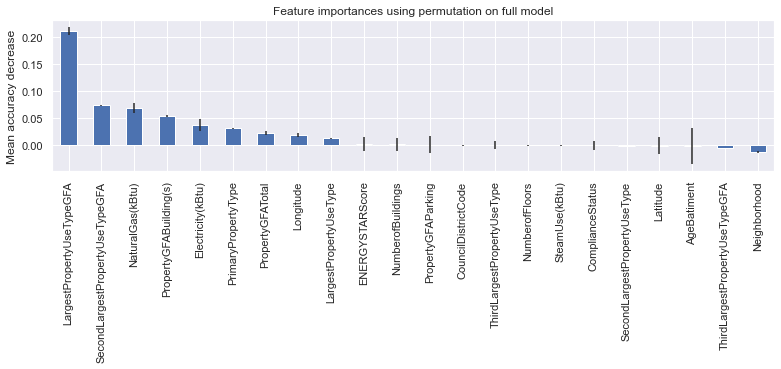

In [113]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()


result = permutation_importance(
    pic_rfr_ess_search2, X_ess_test, y_ess_test, n_repeats=30, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances2 = pd.Series(result.importances_mean, index=X_ess_train.columns)
forest_importances2 = forest_importances2.sort_values(ascending= False)
fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(12
                    , 10.5)
plt.show()

##### On remarque que l'importance de l'ENERGYSTARScore est assez faible dans la modélisation

## Entraînement du modèle optimal puis comparaison des prédictions et des valeurs réelles

In [114]:
y_predicted = pic_gradient_search2.predict(X_test)

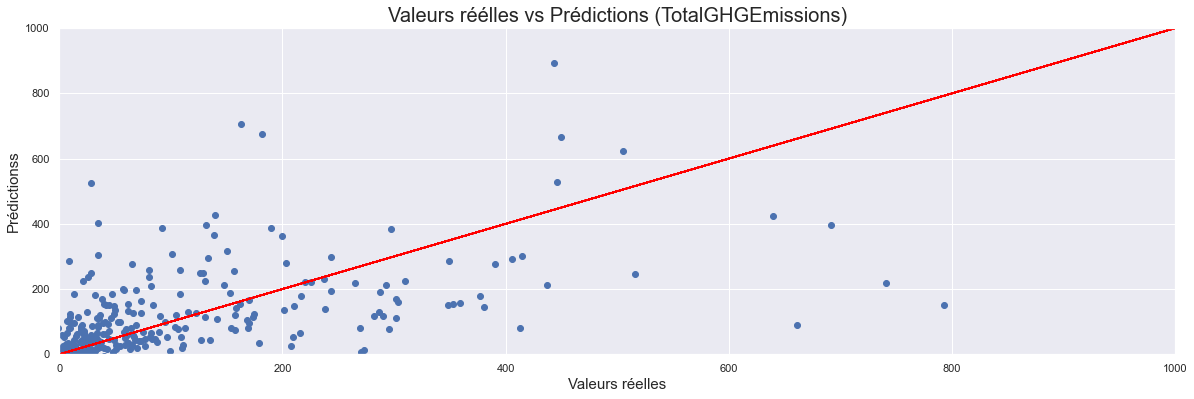

In [115]:
fig = plt.figure(figsize=(20, 6))
plt.title('Valeurs réélles vs Prédictions ({})'.format('TotalGHGEmissions'), fontsize=20)
plt.xlabel('Valeurs réelles', fontsize=15)
plt.ylabel('Prédictionss', fontsize=15)
plt.xlim([0, 1000])
plt.ylim([0, 1000])

# Plotting the scatter plot
plt.scatter(y_test, y_predicted)

# Plotting the x=y line
plot = plt.plot(y_test, y_test, color='red')

In [116]:
pic_gradient_search2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ints',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CouncilDistrictCode',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'AgeBatiment']),
                                                              